In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

pd.set_option("display.float_format", lambda x: "%.2f" % x)

#Simple Linear Regression with OLS Using Scikit Learn


In [ ]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,12.00
3,151.50,41.30,58.50,16.50
4,180.80,10.80,58.40,17.90
...,...,...,...,...
195,38.20,3.70,13.80,7.60
196,94.20,4.90,8.10,14.00
197,177.00,9.30,6.40,14.80
198,283.60,42.00,66.20,25.50


In [ ]:
df.shape

(200, 4)

In [ ]:
#target : sales, regression problemi
X = df[["TV"]]
y = df[["Sales"]]

In [ ]:
#Model
reg_model = LinearRegression().fit(X, y)

In [ ]:
#y_hat = b + w*x
#sabit (b - bias)
#intercept, bias, sabit...
#ilgili sabitleri getirelim
reg_model.intercept_[0] #array olarak döndüğünden [0] ile belirtiyoruz.

6.974821488229891

In [ ]:
#tv'nin katsayısı (w1)
reg_model.coef_[0][0]

0.055464770469558874

In [ ]:
#Tahmin
#150 birimlik TV harcaması olsa ne kadar satış olur?
reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

15.294537058663721

In [ ]:
df.describe().T
#tv satışlarının max ve min değerlerine bakalım,
# veride olmayan bir değeri bile doğrusal ilişkide satışın ne olacağı tahmin edilebilir.

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
Radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
Newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
Sales,200.00,15.13,5.28,1.60,11.00,16.00,19.05,27.00


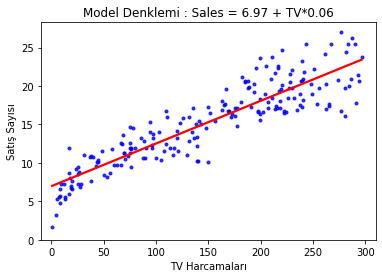

In [ ]:
#Modelin Görselleşttirmesi
g = sns.regplot(x = X, y = y, scatter_kws={"color" : "b", "s" : 9}, #regresyon grafiği için regplot kullanılır.
                ci=False, color="r")
g.set_title(f"Model Denklemi : Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}") # ,2 anlamı virgülden sonra 2 basamak al
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [ ]:
#Tahmin başarısı
y_pred = reg_model.predict(X)
y_pred #tahmin edilen değerler

array([[19.73726517],
       [ 9.44300377],
       [ 7.92881554],
       [15.37773421],
       [17.00285199],
       [ 7.45736499],
       [10.16404579],
       [13.6416869 ],
       [ 7.45181851],
       [18.05668263],
       [10.64104282],
       [18.88310771],
       [ 8.29488303],
       [12.38263661],
       [18.29518114],
       [17.81263764],
       [10.73533293],
       [22.5826079 ],
       [10.8129836 ],
       [15.14478218],
       [19.08832736],
       [20.142158  ],
       [ 7.70695646],
       [19.63742859],
       [10.43027669],
       [21.55650964],
       [14.90073719],
       [20.29191288],
       [20.77445638],
       [10.89063428],
       [23.22045276],
       [13.23679407],
       [12.36599718],
       [21.70626452],
       [12.28280002],
       [23.09843026],
       [21.77836873],
       [11.11803984],
       [ 9.3653531 ],
       [19.62078916],
       [18.20643751],
       [16.79208586],
       [23.2592781 ],
       [18.4504825 ],
       [ 8.36698723],
       [16

In [ ]:
mean_squared_error(y, y_pred) #Ortalama hata.

5.2177438977951285

In [ ]:
#Bu değerin yüksek olup olmadığını bilmiyoruz.
# Olabildiğince küçük tutmak istediğimizden
y.mean() #ortalamasını

Sales   15.13
dtype: float64

In [ ]:
#ve standart sapmasını alıyoruz.
y.std() 

Sales   5.28
dtype: float64

In [ ]:
# Ortalamamız 15 birim, hata oranımız 5 birim yeteri kadar küçük görünüyor,
# ama yine de daha da düşürebilir miyiz diye incelememiz gerekebilir.
#RMSE hesabı yapalım
np.sqrt(mean_squared_error(y, y_pred))

2.2842381438447106

In [ ]:
#MAE değerine bakalım
mean_absolute_error(y, y_pred)

1.8305872641932412

#Metrikleri birbiriyle değil, modelde bir değişiklik yaptıktan sonra tekrar bakacağımız metriklerle karşılaştırmalıyız.
# Mesela ilk baktığımız MSE ile daha sonra bakacağımız MSE skoruyla karşılaştırmalıyız.
# MSE = 5.2177438977951285
# RMSE = 2.2842381438447106
# MAE = 1.8305872641932412

In [ ]:
# R-KARE -> Doğrusal regresyon modellerinde, veri setindeki bağımsız değişkenlerin bağımlı değişkeni açıklama yüzdesidir.
# Biz şimdilik tv yi göz önüne aldığımızdan, tv değişkeninin sale değişkenini açıklama yüzdesidir.
reg_model.score(X, y)

0.8121757029987414

# R-KARE = 0.8121757029987414


# Multiple Linear Regression (ÇOKLU)

In [ ]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,12.00
3,151.50,41.30,58.50,16.50
4,180.80,10.80,58.40,17.90
...,...,...,...,...
195,38.20,3.70,13.80,7.60
196,94.20,4.90,8.10,14.00
197,177.00,9.30,6.40,14.80
198,283.60,42.00,66.20,25.50


In [ ]:
X = df.drop("Sales", axis = 1)
y = df[["Sales"]]

In [ ]:
# Model
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.20, #test boyutu %20
                                                    random_state = 1)
X_train.shape #bağımsız yani tv, radio, newspaper değişkenleri

(160, 3)

In [ ]:
y_train.shape #bağımlı yani sales değişkeni

(160, 1)

In [ ]:
X_test.shape #%20 lik kısım

(40, 3)

In [ ]:
y_test.shape #%20 lik kısım

(40, 1)

In [ ]:
reg_model = LinearRegression().fit(X_train, y_train)

In [ ]:
#Sabitini b sini alalım. (b-> bias)
b = reg_model.intercept_[0]
b

4.63762444239792

In [ ]:
# Ağırlığını (weight) alalım
weight = reg_model.coef_
weight

array([[ 0.05507865,  0.10308563, -0.00090115]])

In [ ]:
# TV :30
# radio :10
# newspaper : 40
# b + w*x
tahmini_sales = b + weight[0][0]*30 + weight[0][1]*10 + weight[0][2]*40
tahmini_sales

7.2847943502867105

In [ ]:
#fonksiyonlaştıralım:
degerler=[[30],[10],[40]]
degerler= pd.DataFrame(degerler).T
tahmini_sales2 = reg_model.predict(degerler)
tahmini_sales2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[7.28479435]])

In [ ]:
#Tahmin Başarısı Değerlendirme
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.6704413245680072

In [ ]:
#Train RKARE-> bağımsız değişkenlerin bağımlı değişkenleri etkileme, açıklama oranıdır.
#Yeni değerler ekleyince açıklama oranımız yükseldi. Başarı arttı. Bir önceki değer 0.8121757029987414
reg_model.score(X_train, y_train)

0.905486333977187

In [ ]:
# Test RMSE
#Predict metodu tahmin etmek için kullanılır.
# Train hatamız = Train RMSE = 1.6704413245680072
#Normalde test hatası train hatasından daha yüksek çıkar.
# Burada ise tam tersi, beklentidışı ve güzel bir durum.
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.552202825951676

In [ ]:
#Bir önceki rkare değeri -> R-KARE = 0.8121757029987414
#Test için RKARE : Yani veri setindeki bağımsız değişkenlerin bağımlı değişkeni açıklama yüzzdesi %88 civarında
#Bir önceki rkare ye oranla bir tık daha yüksek.
reg_model.score(X_test, y_test)

0.8747226291661847

In [ ]:
# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,#bütün veri
                                 y,
                                 cv = 10,#train veri setimiz zaten küçük olduğundan train üzerinde kullanmamayı tercih ediyoruz.
                                 scoring = "neg_mean_squared_error")))#negatif ortalama hatayı veriyor bu yüzden cross_val önüne - koyduk.

1.658502109162588

# 10 Katlı CV RMSE = 1.658502109162588

In [ ]:
# Veri setimiz küçük olduğundan 5 katlı cv de tercih edilebilirdi. Çok bir fark olmayacaktır.
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,#bütün veri
                                 y,
                                 cv = 5,
                                 scoring = "neg_mean_squared_error")))

1.6657702460059216